## Bitsight Data Exercise

#### The dataset
Botnets are infections on computer networks that can have very undesirable consequences. There are many di erent types of botnets, each with its own behavior. This is a data set of observed botnet infections on corporate networks.
There are four columns in the data set:
* Event - this is the botnet type that’s infected the corporate network.
* Date - this is the date that we observed the infection. The date is in YYYY-MM-DD format.
We are observing botnets once daily, which means that, for example, a four day botnet
infection would show up as four separate date entries.
* IP - this is the IP address of the infected machine.
* Entity - entities are companies or organizations. We’re representing them here by a code.
You’ll notice that the code is the  rst three octets of the IP address (technically, this means all entities have a /24 CIDR block).

In [1]:
# standing data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("sampledata.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56526 entries, 0 to 56525
Data columns (total 4 columns):
event     56526 non-null object
date      56526 non-null object
ip        56526 non-null object
entity    56526 non-null object
dtypes: object(4)
memory usage: 1.7+ MB


In [5]:
data.head(10)

,event,date,ip,entity
0,bot3,2015-09-01,235.56.188.57,235.56.188
1,bot3,2015-09-01,206.125.206.160,206.125.206
2,bot3,2015-09-01,75.196.171.216,75.196.171
3,bot2,2015-09-01,70.100.111.202,70.100.111
4,bot1,2015-09-01,75.182.185.3,75.182.185
5,bot3,2015-09-01,235.56.188.100,235.56.188
6,bot1,2015-09-01,235.109.9.162,235.109.9
7,bot2,2015-09-01,191.234.168.12,191.234.168
8,bot1,2015-09-01,204.192.230.149,204.192.230
9,bot2,2015-09-01,168.175.174.235,168.175.174


In [6]:
data.isnull().sum()

event     0
date      0
ip        0
entity    0
dtype: int64

Good there are no empty fields

In [8]:
# Take a look at the fractions of different botnets in data
data['event'].value_counts()

bot2           19001
bot3           13676
bot1           13609
unsolicited    10240
Name: event, dtype: int64

### Challenge 1: Counting
How many of each type of event occurred on September 30, 2015?

### Answer to Challenge 1:

In [9]:
print data['event'][(data['date']=='2015-09-01')].value_counts()

bot2    112
bot3     94
bot1     79
Name: event, dtype: int64


### Challenge 2: IP address infection duration distribution
Count the infection duration in days for each event type for each IP address. Infection duration means the number of contiguous days an infection was seen; for example if an infection was seen on a IP address for  ve contiguous days and then twenty days later for six days, that would be two infections, one of duration five and one of duration six. Plot the duration distribution for each event type across all IP addresses (you should have one plot per event type).

(For this simplied data set, each IP only has infections of one event type).

In [11]:
# First transform the date column to pandas datetime format
data['datetime']=pd.to_datetime(data['date'])

In [12]:
# Now sort first according to to ip and then within each ip, according to the datetime
bot2sorted=data[data['event']=='bot2'].sort_values(by=['ip','datetime'])

In [13]:
# quick check
bot2sorted.head(5)

,event,date,ip,entity,datetime
48077,bot2,2015-10-22,1.92.220.108,1.92.220,2015-10-22
49299,bot2,2015-10-23,1.92.220.108,1.92.220,2015-10-23
35626,bot2,2015-10-09,1.92.220.124,1.92.220,2015-10-09
37035,bot2,2015-10-10,1.92.220.124,1.92.220,2015-10-10
38182,bot2,2015-10-11,1.92.220.124,1.92.220,2015-10-11


In [16]:
# Summarize the different types of events in the dataset
g=data.groupby('event')
g.groups.keys()

['bot1', 'bot3', 'bot2', 'unsolicited']

#### For a given event type, we want to find the continuous ranges of dates for each ip
Idea:
1. If we subtract an input set x with continuous increasing set, then each continuous parts of x would result in a unique constant difference.
2. We group by that unique difference and finally make the count

In [23]:
evtnames=g.groups.keys()
evtnames.sort()
evtgroups=[]
evtcounts=[]
for i in range(len(evtnames)):
    print '====',evtnames[i],'===='
    isorted = data[data['event']==evtnames[i]].sort_values(by=['ip','datetime'])
    isorted['refdate']=pd.date_range(start='2015-09-01',periods=len(isorted))
    isorted['refdelta']=(isorted['datetime'] - isorted['refdate'])
    icount=isorted[['ip','refdelta']].groupby(['ip','refdelta']).size()
    evtgroups.append(isorted)
    evtcounts.append(icount)
    print evtgroups[i].head(2)
    print evtcounts[i].describe()
    print

==== bot1 ====
     event        date             ip     entity   datetime    refdate  \
2936  bot1  2015-09-05  10.222.68.133  10.222.68 2015-09-05 2015-09-01   
3932  bot1  2015-09-06  10.222.68.133  10.222.68 2015-09-06 2015-09-02   

      refdelta  
2936    4 days  
3932    4 days  
count    4336.000000
mean        3.138607
std         1.945728
min         2.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        24.000000
dtype: float64

==== bot2 ====
      event        date            ip    entity   datetime    refdate  \
48077  bot2  2015-10-22  1.92.220.108  1.92.220 2015-10-22 2015-09-01   
49299  bot2  2015-10-23  1.92.220.108  1.92.220 2015-10-23 2015-09-02   

       refdelta  
48077   51 days  
49299   51 days  
count    6027.000000
mean        3.152646
std         2.067463
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        38.000000
dtype: float64

==== bot3 ====
      event        date             ip 

### Answer to Challenge 2

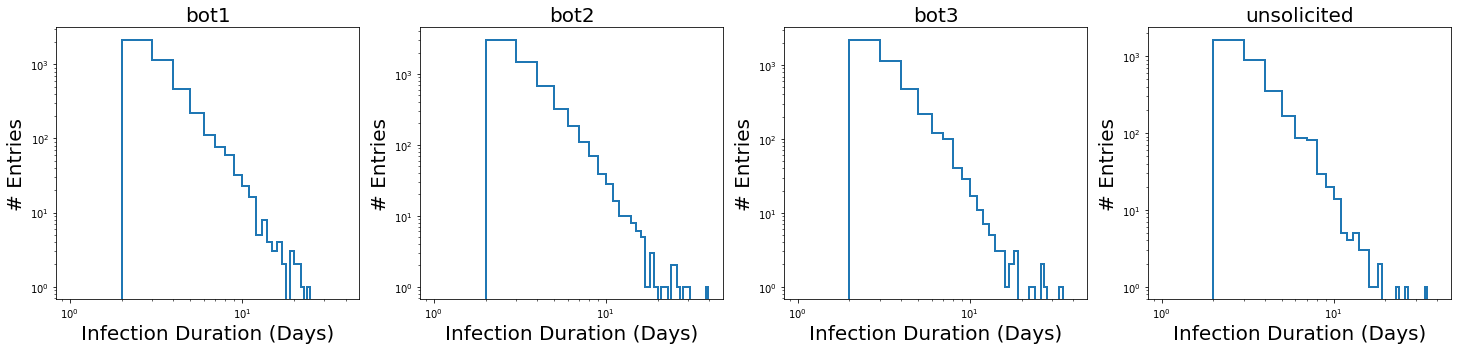

In [27]:
f, axarr = plt.subplots(nrows=1, ncols=len(evtnames), figsize=(25, 5))
for i in range(len(evtnames)):
    axarr[i].hist(evtcounts[i],40,(0,40),histtype='step', linewidth=2,label=evtnames[i])
    axarr[i].set_xscale('log')
    axarr[i].set_yscale('log')
    axarr[i].set_title(evtnames[i], fontsize=20)
    axarr[i].set_xlabel('Infection Duration (Days)', fontsize=20)
    axarr[i].set_ylabel('# Entries', fontsize=20)

### Challenge 3: Entity infection distribution
Count the total number of event-days for each entity. One event-day is one event per day, so if there were  five events on a single day, this would count as  five event-days for that entity. If a single event happened on four days, that would count as four event-days, and so on. You should sum the event-days for each entity. Plot the distribution of event-days for each event type across all entities (you should have one plot per botnet type).

(Hint: you should have 100 values for each event type - one sum of event-days for each the 100 entities)


In [29]:
entgroups=[]
entcounts=[]
for i in range(len(evtnames)):
    print '====',evtnames[i],'===='
    entgroups.append(data[data['event']==evtnames[i]].sort_values(by=['entity','datetime']))
    entcounts.append(entgroups[i].groupby(['entity']).size())
    print entgroups[i].head(2)
    print entcounts[i].describe()
    print

==== bot1 ====
     event        date             ip     entity   datetime
607   bot1  2015-09-02  10.222.68.142  10.222.68 2015-09-02
1340  bot1  2015-09-03  10.222.68.142  10.222.68 2015-09-03
count    100.000000
mean     136.090000
std      135.577187
min       23.000000
25%       49.750000
50%       86.500000
75%      168.250000
max      807.000000
dtype: float64

==== bot2 ====
     event        date           ip    entity   datetime
4807  bot2  2015-09-07  1.92.220.29  1.92.220 2015-09-07
5372  bot2  2015-09-08  1.92.220.29  1.92.220 2015-09-08
count    100.000000
mean     190.010000
std      145.654323
min       46.000000
25%       90.750000
50%      143.000000
75%      237.250000
max      824.000000
dtype: float64

==== bot3 ====
   event        date             ip     entity   datetime
10  bot3  2015-09-01  1.106.159.186  1.106.159 2015-09-01
95  bot3  2015-09-01  1.106.159.156  1.106.159 2015-09-01
count    100.000000
mean     136.760000
std      133.792325
min       23.00000

### Answer to Challenge 3

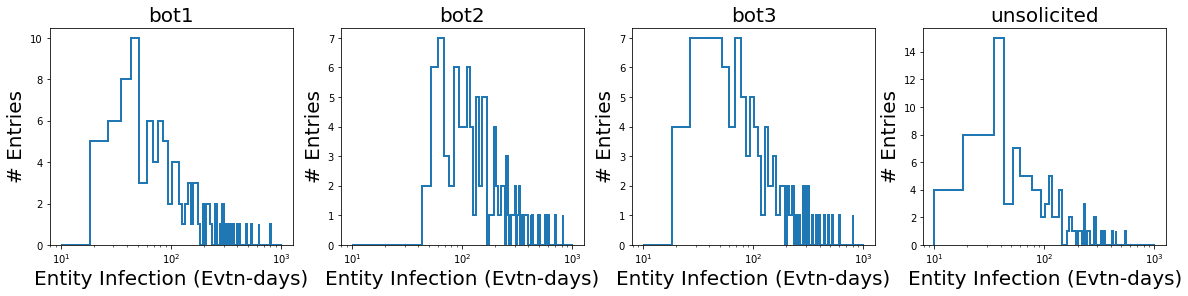

In [42]:
f, axarr = plt.subplots(nrows=1, ncols=len(evtnames), figsize=(20, 4))
for i in range(len(evtnames)):
    axarr[i].hist(entcounts[i],120,(10,1010),histtype='step',linewidth=2,label=evtnames[i])
    axarr[i].set_xscale('log')
    axarr[i].set_title(evtnames[i], fontsize=20)
    axarr[i].set_xlabel('Entity Infection (Evtn-days)', fontsize=20)
    axarr[i].set_ylabel('# Entries', fontsize=20)

### Challenge 4: Identifying the distribution
Describe and discuss the distribution for “bot2” in Challenge 3. What kind of distribution does it
look like?

### Answer to Challenge 4:
Since on a log-log scale the distribution looks linear, this looks like a power-law histribution.

### Challenge 5: Bonus question
If you’ve got this far, well done! This is an optional bonus question.
Can you fit different distributions types to the "bot2" distribution? Which distribution type is the best fit? Please measure how well the distributions model the data.

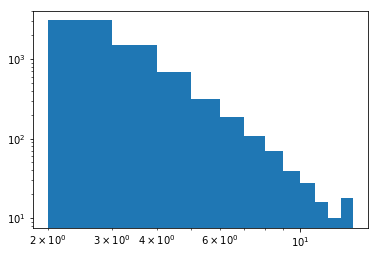

In [35]:
# First obtain the histogram of the histribution
x = evtcounts[1].as_matrix()
[hy,b1,p1] = plt.hist(x,12,(2,14))
plt.xscale('log')
plt.yscale('log')
hx = [(s+t)/2 for s, t in zip(b1, b1[1:])] # take the bin centers as x
ye = np.sqrt(hy) # error for each bin (assuming that average of a random is gaussian by the centeral limit theorem)

In [40]:
# Now fit the distribution
# The distribution falls steeply, and is roughly linear on a log-log plot.
# We guess that the functional form is is a power law distribution
# We also fit an expotential for comparison
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
def fpower(x,a,b):
    return a * x ** b
def fexp(x,a,b):
    return a * np.exp(np.multiply(b,x))
popt, pcov = curve_fit(fpower, hx, hy, sigma=ye)
popt2, pcov2 = curve_fit(fexp, hx, hy)

### Answer to Challenge 5

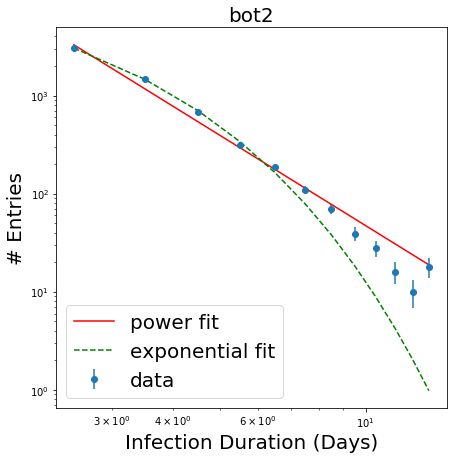

In [56]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.xscale('log')
plt.yscale('log')
plt.errorbar(hx, hy, yerr=ye, fmt='o',label='data')
plt.plot(hx, fpower(hx, *popt), 'r-', label='power fit')
plt.plot(hx, fexp(hx, *popt2), 'g--', label='exponential fit')
plt.legend(loc='lower left', fontsize=20)
ax.set_title('bot2', fontsize=20)
ax.set_xlabel('Infection Duration (Days)', fontsize=20)
ax.set_ylabel('# Entries', fontsize=20)

### Now measure the model performance
Using root mean squared error as the error metric

In [59]:
print 'The root mean square error for power law fit =', np.sqrt(mean_squared_error(hy, fpower(hx, *popt)))
print 'The root mean square error for exponential fit =',np.sqrt(mean_squared_error(hy, fexp(hx, *popt2)))

The root mean square error for power law fit = 120.766239446
The root mean square error for exponential fit = 21.1202900499


### Conclusion of the fit
We see that the root mean standard error is numerically smaller for the exponential fit. This does not however automatically imply that the exponential is a better fit. From the plot above, we see that the exponential function fits the data well for the first 5 bins but it does not capture the tail of the distribution. However since the distribution falls sharply the first few bin dominate the mean error.

The power-law distribution captures the tail, however, it does slightly worse for the first few bins. But since the mean error is dominate by the first few bins, the performance measure is much worse than the exponential.

In conclusion each functional form does a bit better for a different range of the data. I think a combined function power-law + exponential is probably the best.